In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

C:\Users\seolbluewings\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_csv(r"C:\Users\seolbluewings\Desktop\sample\telco_customer_churn.csv") 

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- churn 컬럼이 이탈 여부를 표기하는 컬럼이고
- 대다수 컬럼이 범주형 변수인데 Monthly Charges, Total Charges 컬럼은 연속형 변수 

In [4]:
# TotalCharges 컬럼의 데이터 타입을 numeric으로 변경
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df['TotalCharges'] = df.TotalCharges.fillna(0)

#### 고객의 이탈을 예측하는데 y변수로 사용될 컬럼의 값을 이탈일 경우 1 아닌 경우 0으로 변경

- 그 외 나머지 카테고리 변수들도 코드값으로 형태 변경

In [5]:
df['Churn'] = df['Churn'].apply(lambda x : 1 if x == 'Yes' else 0)
df['gender'] = df['gender'].apply(lambda x : 1 if x == 'Male' else 0)
df['Partner'] = df['Partner'].apply(lambda x : 1 if x == 'Yes' else 0)
df['Dependents'] = df['Dependents'].apply(lambda x : 1 if x == 'Yes' else 0)
df['PhoneService'] = df['PhoneService'].apply(lambda x : 1 if x == 'Yes' else 0)
df['PaperlessBilling'] = df['PaperlessBilling'].apply(lambda x : 1 if x == 'Yes' else 0)

In [6]:
column_replace = {
    "MultipleLines" : {"Yes" : 2, "No" : 1, "No phone service" : 0},
    "InternetService" : {"DSL" : 2, "Fiber optic" : 1, "No" : 0},
    "OnlineSecurity" : {"Yes" : 2, "No" : 1, "No internet service" : 0},
    "OnlineBackup" : {"Yes" : 2, "No" : 1, "No internet service" : 0},
    "DeviceProtection" : {"Yes" : 2, "No" : 1, "No internet service" : 0},
    "TechSupport" : {"Yes" : 2, "No" : 1, "No internet service" : 0},
    "StreamingTV" : {"Yes" : 2, "No" : 1, "No internet service" : 0},
    "StreamingMovies" : {"Yes" : 2, "No" : 1, "No internet service" : 0},
    "Contract" : {"Two year" : 2, "One year" : 1, "Month-to-month" : 0},
    "PaymentMethod" : {"Credit card (automatic)" : 3, "Bank transfer (automatic)" : 2
                       , "Mailed check" : 1, "Electronic check" : 0}
 }

df = df.replace(column_replace)

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,2,1,2,1,1,1,1,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,1,2,2,1,2,1,1,1,1,0,1,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,1,2,2,2,1,1,1,1,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,2,2,1,2,2,1,1,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,1,1,1,1,1,1,1,1,0,1,0,70.70,151.65,1
5,9305-CDSKC,0,0,0,0,8,1,2,1,1,1,2,1,2,2,0,1,0,99.65,820.50,1
6,1452-KIOVK,1,0,0,1,22,1,2,1,1,2,1,1,2,1,0,1,3,89.10,1949.40,0
7,6713-OKOMC,0,0,0,0,10,0,0,2,2,1,1,1,1,1,0,0,1,29.75,301.90,0
8,7892-POOKP,0,0,1,0,28,1,2,1,1,1,2,2,2,2,0,1,0,104.80,3046.05,1
9,6388-TABGU,1,0,0,1,62,1,1,2,2,2,1,1,1,1,1,0,2,56.15,3487.95,0


#### Kaplan-Meier Graph

- 가장 먼저 실행할 것은 대략적인 Kaplan-Meier Plot을 그려보는 것

In [9]:
from lifelines import KaplanMeierFitter

In [10]:
duration = df['tenure'] # Time to event data of censored and event data

event_observed = df['Churn'] # churn : 1 censored : 0

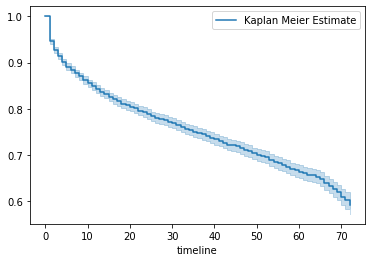

In [11]:
km = KaplanMeierFitter()
km.fit(duration, event_observed, label = 'Kaplan Meier Estimate')
km.plot()

#### 고객의 스트리밍 서비스 구독 방식에 따라 이탈 가능성의 차이가 있는지 보고자 한다
- 서비스를 월마다 갱신하는 것이 아닌, 장기구독 형태일수록 이탈 확률이 줄어듬

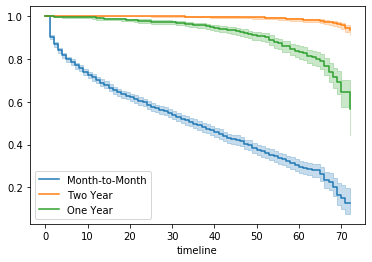

In [12]:
kmf = KaplanMeierFitter()

t = df['tenure'] # time to event
e = df['Churn'] # event occured or censored

groups = df['Contract']
cohort1 = (groups == 0)
cohort2 = (groups == 2)
cohort3 = (groups == 1)

kmf.fit(t[cohort1], e[cohort1], label = 'Month-to-Month')
ax = kmf.plot()

kmf.fit(t[cohort2], e[cohort2], label = 'Two Year')
ax1 = kmf.plot(ax = ax)

kmf.fit(t[cohort3], e[cohort3], label = 'One Year')
kmf.plot(ax = ax1)

In [13]:
from lifelines import WeibullAFTFitter
from lifelines.calibration import survival_probability_calibration

In [14]:
df[(df['tenure'] == 0)] = 0.0001

In [15]:
aft = WeibullAFTFitter()
aft.fit(df.iloc[:,1:], duration_col = 'tenure', event_col = 'Churn')

<lifelines.WeibullAFTFitter: fitted with 7043 total observations, 5163 right-censored observations>

#### WeibullAFTFitter() 함수 parameter
- alpha : 신뢰구간 수준을 결정하는 parameter, default로 두면 될 듯!
- fit_intercept : AFT 모델에서 상수항을 추가하는지 여부, default는 True
- penalizer : 값은 0 이상의 숫자를 넣어야 하고 penalty term에 곱하는 값으로 활용됨
- l1_ratio : L1 type penalty에 얼마의 비중을 줄 것인가?
- penalty term : penalizer * l1_ratio * ||w||_1 + 0.5 * penalizer * (1 - l1_ratio) * ||w||^2_2

In [16]:
print(aft.params_)

param    covariate       
lambda_  Contract            0.661551
         Dependents          0.117895
         DeviceProtection    0.304133
         InternetService    -0.976046
         MonthlyCharges     -0.068353
         MultipleLines       0.317840
         OnlineBackup        0.362946
         OnlineSecurity      0.515828
         PaperlessBilling   -0.110283
         Partner             0.127576
         PaymentMethod       0.120121
         PhoneService        0.853566
         SeniorCitizen      -0.021131
         StreamingMovies     0.503516
         StreamingTV         0.488304
         TechSupport         0.453186
         TotalCharges        0.000731
         gender              0.033123
         Intercept           3.746049
rho_     Intercept           0.274751
dtype: float64


#### 결과 해석
- gender 에 대한 positive effect가 있는 것으로 보인다.
- 앞서 우리가 남성일 경우 1, 여성일 경우 0으로 설정하였으므로
- $\text{exp}(0.03) = 1.03 $ 인 결과를 반영하여, 남성의 경우 평균적인 생존 시간이 대략 3% 증가한다고 해석할 수 있다.
- intercept는 $\log{t}$에 대한 회귀식에서 사용되는 상수항이며
- rho_intercept 값은 포스팅의 $\kappa$에 해당하는 값

In [17]:
aft.print_summary()

<lifelines.WeibullAFTFitter: fitted with 7043 total observations, 5163 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
   number of observations = 7043
number of events observed = 1880
           log-likelihood = -8246.33
         time fit was run = 2021-09-14 13:20:20 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                
lambda_ Contract           0.66       1.94       0.05             0.56             0.76                 1.75                 2.15
        Dependents         0.12       1.13       0.05             0.01             0.22                 1.02                 1.25
        DeviceProtection   0.30       1.36       0.05             0.20             0.40                 1.23                 1.50
        InternetService   -0.98       0.38       0.11            -1.19            -0.77                 0.31                 0.46
        MonthlyCharges    -0.07       0.93       0.00            -0.08            -0.06                 0.93                 0.94
        MultipleLines      0.32       1.37       0.05             0.22             0.41                 1.25                 1.51
        OnlineBackup       0.36       1.44       0.05             0.26             0.47                 1.30                 1.59
        OnlineSecurity     0.52       1.68       0.06             0.39             0.64                 1.48                 1.89
        PaperlessBilling  -0.11       0.90       0.04            -0.19            -0.03                 0.82                 0.97
        Partner            0.13       1.14       0.04             0.05             0.21                 1.05                 1.23
        PaymentMethod      0.12       1.13       0.02             0.09             0.15                 1.09                 1.17
        PhoneService       0.85       2.35       0.12             0.62             1.09                 1.86                 2.97
        SeniorCitizen     -0.02       0.98       0.04            -0.11             0.06                 0.90                 1.06
        StreamingMovies    0.50       1.65       0.07             0.37             0.64                 1.45                 1.89
        StreamingTV        0.49       1.63       0.07             0.36             0.62                 1.43                 1.86
        TechSupport        0.45       1.57       0.06             0.34             0.57                 1.40                 1.77
        TotalCharges       0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
        gender             0.03       1.03       0.04            -0.04             0.10                 0.96                 1.11
        Intercept          3.75      42.35       0.11             3.52             3.97                33.81                53.06
rho_    Intercept          0.27       1.32       0.02             0.24             0.31                 1.27                 1.37

                              z      p   -log2(p)
param   covariate                                
lambda_ Contract          12.56 <0.005     117.76
        Dependents         2.24   0.02       5.33
        DeviceProtection   5.92 <0.005      28.24
        InternetService   -9.14 <0.005      63.76
        MonthlyCharges   -14.68 <0.005     159.66
        MultipleLines      6.66 <0.005      35.14
        OnlineBackup       6.96 <0.005      38.11
        OnlineSecurity     8.29 <0.005      52.91
        PaperlessBilling  -2.57   0.01       6.62
        Partner            3.12 <0.005       9.12
        PaymentMethod      7.01 <0.005      38.60
        PhoneService       7.11 <0.005      39.62
        SeniorCitizen     -0.49   0.62       0.68
        StreamingMovies    7.41 <0.005      42.89
      

- train dataset의 생존시간의 평균/중위수를 구할 수 있는 함수 

In [18]:
print("Mean Survival Time : {:.3f}".format(aft.mean_survival_time_))
print("Median Survival Time : {:.3f}".format(aft.median_survival_time_))      

Mean Survival Time : 15.506
Median Survival Time : 12.740


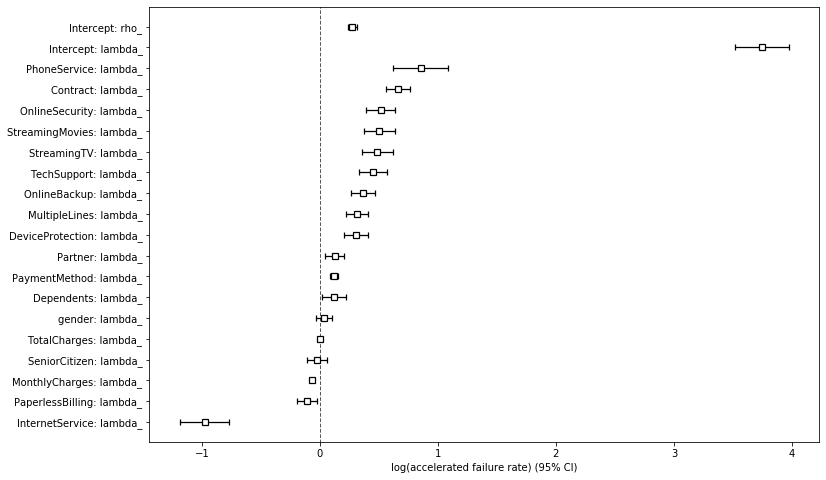

In [19]:
plt.figure(figsize=(12, 8))
aft.plot()

- plot 그림을 통해서 생존 시간에 변수가 미치는 영향력을 확인할 수 있다.
- boxplot이 각 변수의 coef에 대한 95% 신뢰구간을 보여준다.
- 각 변수의 값에 따라 Survival Function이 어떻게 변화하는지도 확인할 수 있다.

Text(0.5, 1.0, 'Partial Effects on Outcome by PaymentMethod')

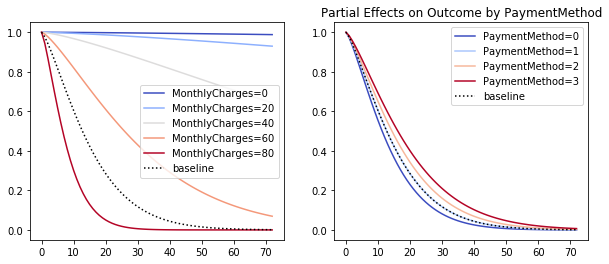

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

aft.plot_partial_effects_on_outcome('MonthlyCharges', range(0,100,20),  cmap='coolwarm', ax=ax[0])
ax[1].set_title("Partial Effects on Outcome by MonthlyCharges ")

aft.plot_partial_effects_on_outcome('PaymentMethod', range(0,4,1),  cmap='coolwarm', ax=ax[1])
ax[1].set_title("Partial Effects on Outcome by PaymentMethod")

In [21]:
from lifelines.utils import k_fold_cross_validation

- k는 K Fold Cross Validaiton에서 사용할 parameter k
- K 개수만큼 데이터셋을 나누고 이를 활용한 Cross Validation 실행

In [25]:
scores = k_fold_cross_validation(aft, df.iloc[:,1:], duration_col = 'tenure', event_col = 'Churn', k = 5)

In [28]:
print(np.mean(scores))

-1.1735412228764432


#### Calibration Plot
- 이탈 여부를 예측하는 모델의 예측이 실제를 얼마나 잘 반영하는지를 평가하기 위한 목적의 Plot
- 이탈 가능성을 0.7이라 예측했을 때, 0.7이란 숫자가 정말 합당한 숫자인지 평가한다.
- x축에는 예측한 predicted Probability가 나열되고 적정 수준으로 Histogram을 그리게 됨
- y축에는 해당 Histogram 범주에 속한 Y label 데이터가 있다고 보면 된다. 
- 해당 그룹 내의 Y label을 바탕으로 실제 관측값의 observed 확률을 계산한다. 
- 확률이 구해지고 Y 데이터 개수만큼의 시행을 하는 이항분포를 가정할 수 있고, 이를 바탕으로 신뢰구간 그리기도 가능하다.
- 45도 각도의 기준선과 가까울수록 예측값이 실제를 잘 반영한다고 판단할 수 있다.

In [29]:
from lifelines.calibration import survival_probability_calibration

ICI =  0.0072658262227703555
E50 =  0.004206451222822261


C:\Users\seolbluewings\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seolbluewings\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


(<matplotlib.axes._subplots.AxesSubplot at 0x25153fc8390>,
 0.0072658262227703555,
 0.004206451222822261)

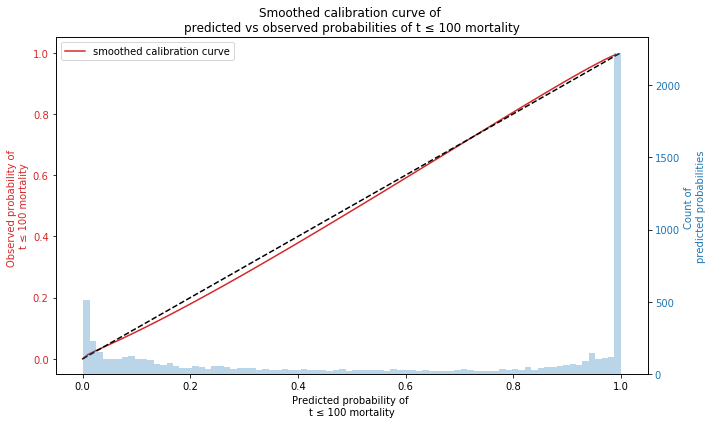

In [36]:
plt.figure(figsize=(10, 6))
survival_probability_calibration(aft, df.iloc[:,1:], t0 = 100)

In [ ]:
# all regression models can be used here, WeibullAFTFitter is used for illustration
wf = WeibullAFTFitter().fit(rossi, "week", "arrest")

# filter down to just censored subjects to predict remaining survival
censored_subjects = rossi.loc[~rossi['arrest'].astype(bool)]
censored_subjects_last_obs = censored_subjects['week']

# predict new survival function
wf.predict_survival_function(censored_subjects, conditional_after=censored_subjects_last_obs)

# predict median remaining life
wf.predict_median(censored_subjects, conditional_after=censored_subjects_last_obs)

In [42]:
censored_df = df.loc[~df['Churn'].astype(bool)]
censored_df_last_obs = censored_df['tenure']

aft.predict_survival_function(censored_df.iloc[:,1:], conditional_after = censored_df_last_obs)

0         1         3         6         7         9         10    \
0.0001   0.999997  0.999999  0.999999  0.999996  0.999996  1.000000  0.999997   
1.0000   0.963616  0.991604  0.994776  0.964935  0.963784  0.998528  0.969138   
2.0000   0.922758  0.983207  0.989546  0.930662  0.927930  0.997052  0.938589   
3.0000   0.879535  0.974811  0.984309  0.897197  0.892549  0.995570  0.908413   
4.0000   0.835175  0.966420  0.979068  0.864553  0.857736  0.994084  0.878662   
...           ...       ...       ...       ...       ...       ...       ...   
68.0000  0.001997  0.498298  0.658646  0.042959  0.023203  0.892768  0.048018   
69.0000  0.001775  0.492503  0.654121  0.040691  0.021687  0.891128  0.045502   
70.0000  0.001577  0.486759  0.649615  0.038536  0.020265  0.889488  0.043109   
71.0000  0.001400  0.481065  0.645128  0.036488  0.018932  0.887848  0.040834   
72.0000  0.001242  0.475422  0.640661  0.034543  0.017682  0.886207  0.038671   

             11        12        14        15        16        17        19    \
0.0001   1.000000  1.000000  0.999997  1.000000  0.999999  1.000000  0.999992   
1.0000   0.997936  0.999142  0.966464  0.999976  0.993974  0.999917  0.923908   
2.0000   0.995839  0.998281  0.933682  0.999951  0.987951  0.999834  0.852677   
3.0000   0.993712  0.997417  0.901663  0.999926  0.981931  0.999750  0.786106   
4.0000   0.991556  0.996548  0.870414  0.999902  0.975915  0.999666  0.723991   
...           ...       ...       ...       ...       ...       ...       ...   
68.0000  0.824904  0.935652  0.052485  0.998139  0.622499  0.993710  0.000883   
69.0000  0.822124  0.934640  0.049905  0.998109  0.617688  0.993609  0.000782   
70.0000  0.819343  0.933627  0.047443  0.998079  0.612902  0.993508  0.000692   
71.0000  0.816561  0.932613  0.045096  0.998049  0.608142  0.993407  0.000612   
72.0000  0.813780  0.931598  0.042858  0.998019  0.603407  0.993305  0.000542   

             21        23        24        25        28        30    \
0.0001   0.999999  1.000000  1.000000  0.999998  1.000000  1.000000   
1.0000   0.994732  0.999348  0.997253  0.978365  0.999939  0.999923   
2.0000   0.989369  0.998693  0.994497  0.956994  0.999879  0.999846   
3.0000   0.983920  0.998036  0.991733  0.935895  0.999818  0.999768   
4.0000   0.978391  0.997375  0.988960  0.915074  0.999756  0.999691   
...           ...       ...       ...       ...       ...       ...   
68.0000  0.594769  0.950695  0.804801  0.158997  0.995412  0.994169   
69.0000  0.589294  0.949913  0.801935  0.154126  0.995339  0.994076   
70.0000  0.583849  0.949130  0.799073  0.149390  0.995265  0.993982   
71.0000  0.578436  0.948347  0.796213  0.144786  0.995191  0.993888   
72.0000  0.573052  0.947561  0.793356  0.140310  0.995117  0.993794   

                 31        32        33        34        35        37    \
0.0001   9.999872e-01  1.000000  0.999999  0.999997  1.000000  0.999999   
1.0000   8.719937e-01  0.995263  0.990841  0.961399  0.999951  0.989901   
2.0000   7.492862e-01  0.990498  0.980239  0.918158  0.999901  0.979839   
3.0000   6.361976e-01  0.985706  0.968634  0.872545  0.999851  0.969818   
4.0000   5.346952e-01  0.980889  0.956267  0.825876  0.999801  0.959839   
...               ...       ...       ...       ...       ...       ...   
68.0000  2.260872e-09  0.666679  0.213669  0.001357  0.996261  0.446110   
69.0000  1.554859e-09  0.662092  0.207505  0.001197  0.996201  0.440212   
70.0000  1.067618e-09  0.657522  0.201493  0.001056  0.996141  0.434376   
71.0000  7.319097e-10  0.652970  0.195631  0.000930  0.996080  0.428603   
72.0000  5.009823e-10  0.648435  0.189916  0.000820  0.996020  0.422893   

             40        41        42        43        44        45        46    \
0.0001   0.999998  1.000000  0.999999  1.000000  0.999996  0.999998  0.999996   
1.0000   0.984460  0.999821  0.994602  0.999771  0.957617  0.984875  0.955344   
2.0000   0.968740  0.999641  0.989142  0.999541  0.916167  0.969890  0

- row값인 시간 t에 따라서 각 개체의 생존 확률이 어떻게 변화하는가를 볼 수 있다.
- 0과 1로 값을 구분할 Cut-Off는 사용자가 기준으로 삼으면 되고
- 특정 고객에 대해서 생존함수를 그리고자 한다면 아래와 같이 그림을 그릴 수 있다. 

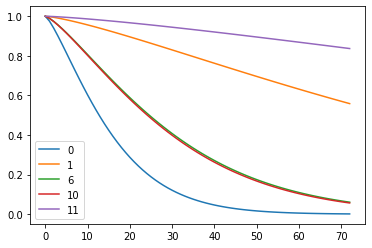

In [46]:
aft.predict_survival_function(censored_df.iloc[[0,1,3,6,7],1:]).plot()